# Bitwise And

需要上傳`lena.bmp`灰階圖

In [ ]:
!pip install opencv-contrib-python -U#最新版


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -#


In [ ]:
from google.colab.patches import cv2_imshow #google.colab提供的cv2.im show
import cv2 #cv2 = onpen cv
import numpy as np
from matplotlib import pyplot as plt # matplotlib 畫圖程式

print(cv2.__version__)

4.1.2


# 矩陣位元相加

In [ ]:
a=np.random.randint(0,255,(5,5),dtype=np.uint8) #5*5大小矩陣 介於0～255
a2=np.ones((5,5),dtype=np.uint8) #numpy 的 ones 都是1
b=np.zeros((5,5),dtype=np.uint8) #都是0
b[0:3,0:3]=255 #x→0、1、2 
b[4,4]=255 #0、1、2、3、4
c=cv2.bitwise_and(a,b)
c2=cv2.bitwise_and(a2,b)
d=cv2.bitwise_or(a2,b)
e=cv2.bitwise_xor(a2,b)

print("a=\n",a)
print("a2=\n",a2)
print("b=\n",b)
print("c=\n",c)
print("c2=\n",c2) #musk
print("d=\n",d) #or
print("e=\n",e) #xor

a=
 [[ 18  53 109  48 231]
 [ 81 189 123  48 193]
 [241 250 253 107  75]
 [226  51 202 157 254]
 [240  51 208 152 155]]
a2=
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
b=
 [[255 255 255   0   0]
 [255 255 255   0   0]
 [255 255 255   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0 255]]
c=
 [[ 18  53 109   0   0]
 [ 81 189 123   0   0]
 [241 250 253   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0 155]]
c2=
 [[1 1 1 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]]
d=
 [[255 255 255   1   1]
 [255 255 255   1   1]
 [255 255 255   1   1]
 [  1   1   1   1   1]
 [  1   1   1   1 255]]
e=
 [[254 254 254   1   1]
 [254 254 254   1   1]
 [254 254 254   1   1]
 [  1   1   1   1   1]
 [  1   1   1   1 254]]


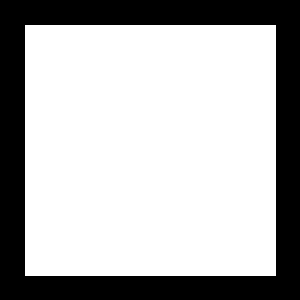

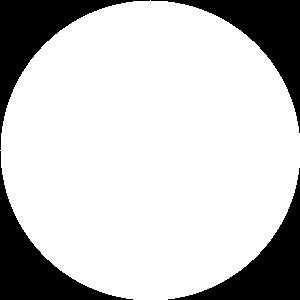

In [ ]:
# draw a rectangle
rectangle = np.zeros((300, 300), dtype="uint8") #方形 300*300 二質化純黑色
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1) #大小、大小、質（白色填進去）
cv2_imshow(rectangle)#畫正方形

# draw a circle
circle = np.zeros((300, 300), dtype = "uint8") #長寬
cv2.circle(circle, (150, 150), 150, 255, -1) #畫圓
cv2_imshow(circle)

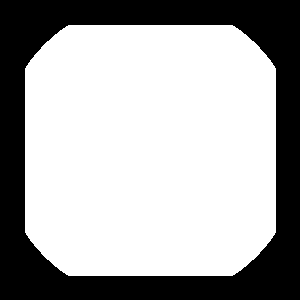

In [ ]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle) #兩個圖都要有存在才會留下來 →交集
cv2_imshow(bitwiseAnd)

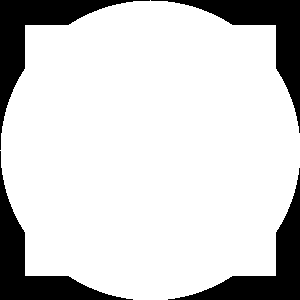

In [ ]:
bitwiseOr = cv2.bitwise_or(rectangle, circle) #圓形、四方型都在 →聯集
cv2_imshow(bitwiseOr)

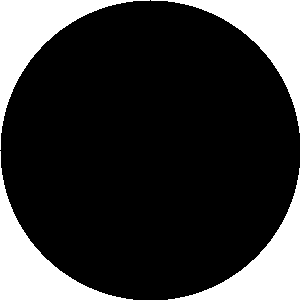

In [ ]:
bitwiseNot = cv2.bitwise_not(circle) # 有的地方沒有，沒有的地方有→負片
cv2_imshow(bitwiseNot)

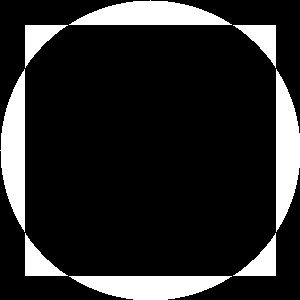

In [ ]:
bitwiseXor = cv2.bitwise_xor(rectangle, circle) #互補
cv2_imshow(bitwiseXor)


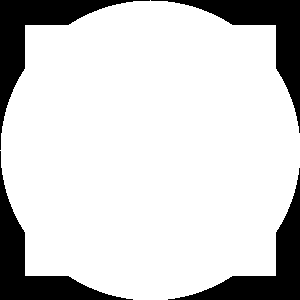

In [ ]:
add = cv2.add(rectangle, circle) #把質加起來→or
cv2_imshow(add)

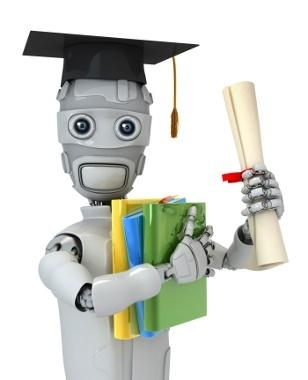

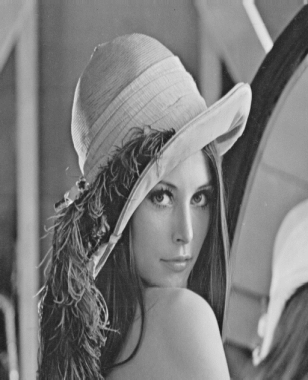

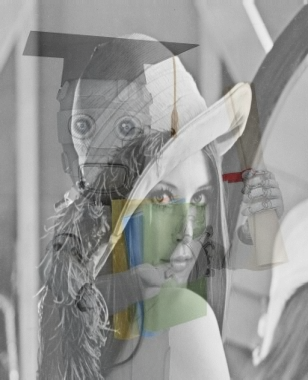

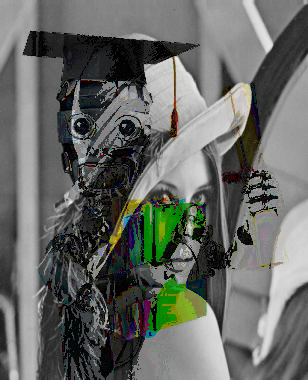

In [ ]:
img1 = cv2.imread('ml.png')
img2 = cv2.imread('lena.bmp')
img2 = cv2.resize(img2, (308, 380), interpolation=cv2.INTER_AREA)#把lena大小改成跟ml一樣

dst = cv2.addWeighted(img1,0.3,img2,0.7,0.3)#權重 or運算把兩張圖並起來 0.3亮度 透明度不一樣
bitwiseAnd = cv2.bitwise_and(img1,img2)

cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(dst)
cv2_imshow(bitwiseAnd)

# 圖片位元相加

(512, 512)


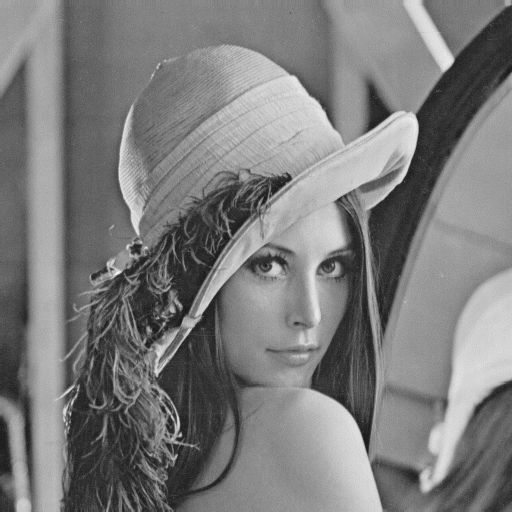

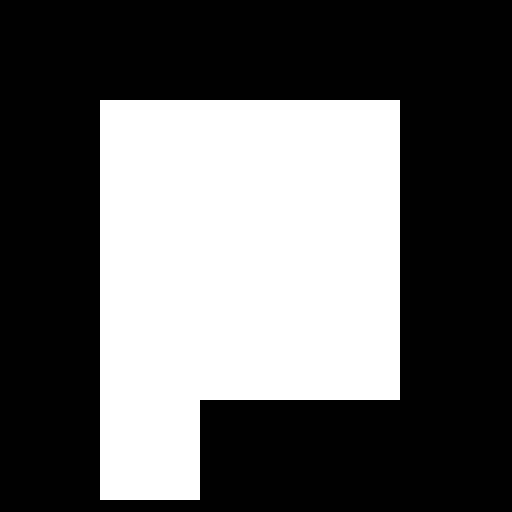

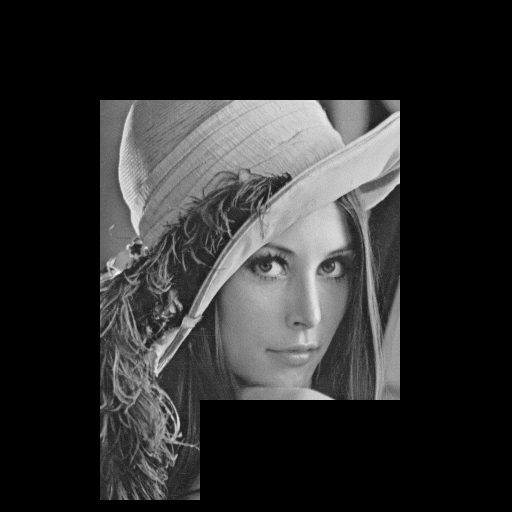

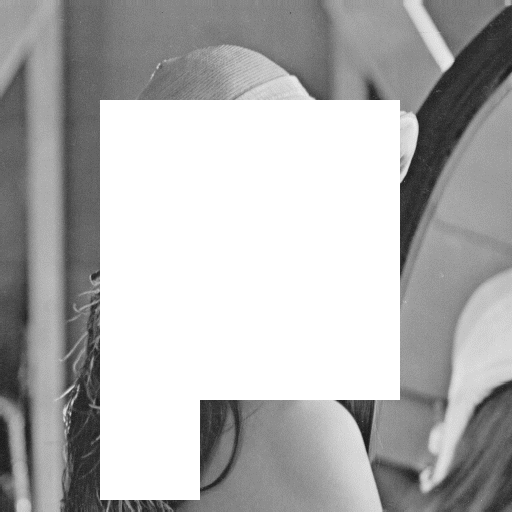

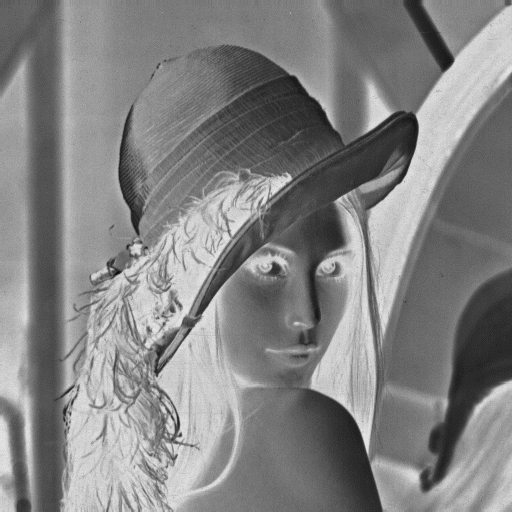

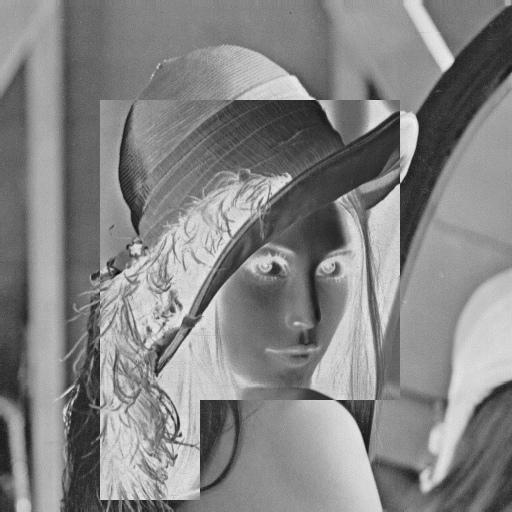

In [ ]:
a = cv2.imread("lena.bmp",0) #0→只取灰階圖像
print(a.shape)
b = np.ones(a.shape,dtype=np.uint8)
b[100:400,200:400] = 255
b[100:500,100:200] = 255
c = cv2.bitwise_and(a, b) #兩塊都有
d = cv2.bitwise_or(a, b) #都有
e = cv2.bitwise_not(a) #負片
f = cv2.bitwise_xor(a, b) #一邊有一邊沒有

cv2_imshow(a)
cv2_imshow(b)
cv2_imshow(c)
cv2_imshow(d)
cv2_imshow(e)
cv2_imshow(f)



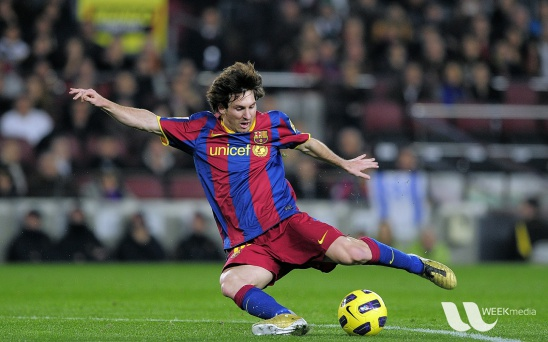

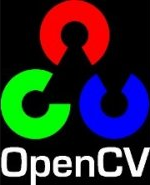

In [ ]:
# Load two images
img1 = cv2.imread('messi5.jpg')
img2 = cv2.imread('opencv_logo.png') #RGB + 透明度

cv2_imshow(img1)
cv2_imshow(img2)



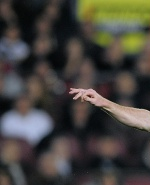

In [ ]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ] #從0開始 左上角 大小→行、列

cv2_imshow(roi)

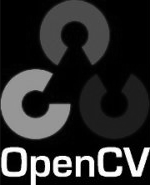

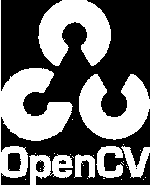

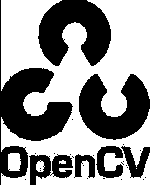

In [ ]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY) #新圖→彩色圖轉成灰階
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)#img2gray灰階圖→轉黑白圖
mask_inv = cv2.bitwise_not(mask) #轉色、互換
cv2_imshow(img2gray)
cv2_imshow(mask)
cv2_imshow(mask_inv)


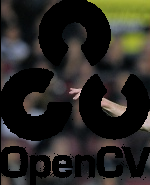

In [ ]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)#圖要的地方留下來，不要的地方蓋掉
cv2_imshow(img1_bg)


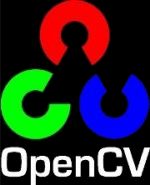

In [ ]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)#兩張opencv logo 剪出來，蓋上原圖
cv2_imshow(img2_fg)


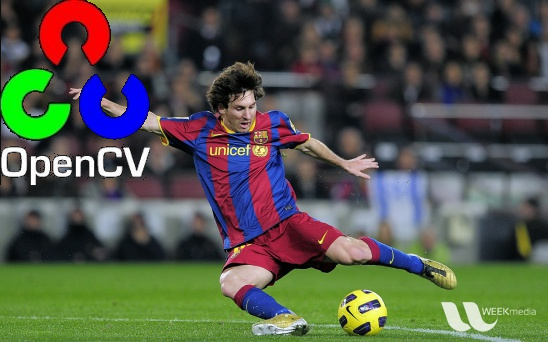

In [ ]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2_imshow(img1)

In [ ]:
https://medium.com/linux-on-raspberry-pi4/opencv-bitwise-and-%E7%9A%84mask%E9%80%9A%E4%BF%97%E7%90%86%E8%A7%A3-%E8%BD%89%E9%8C%84-d19cd63f34f0

# 位平面分解

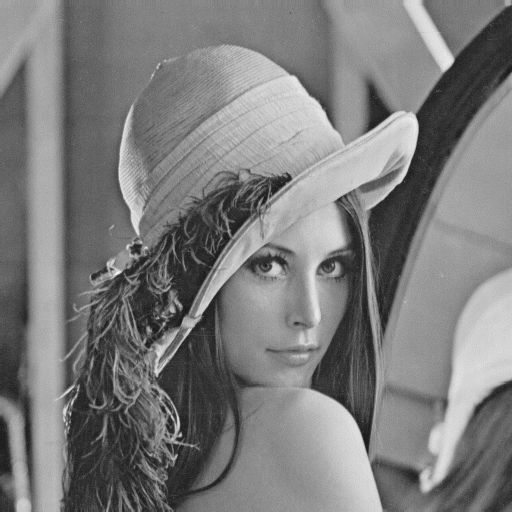

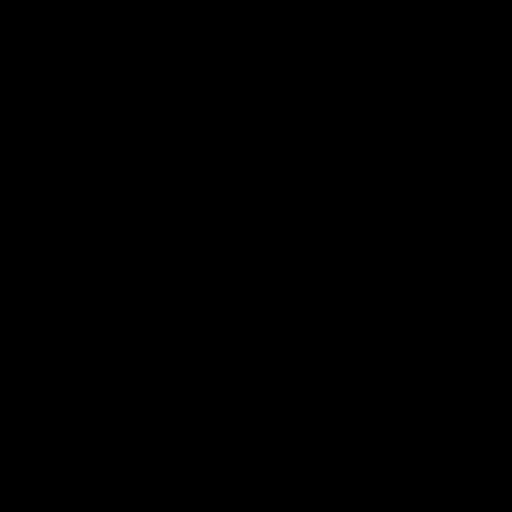

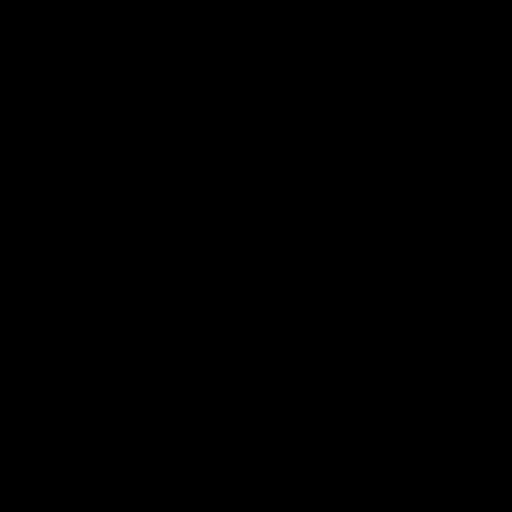

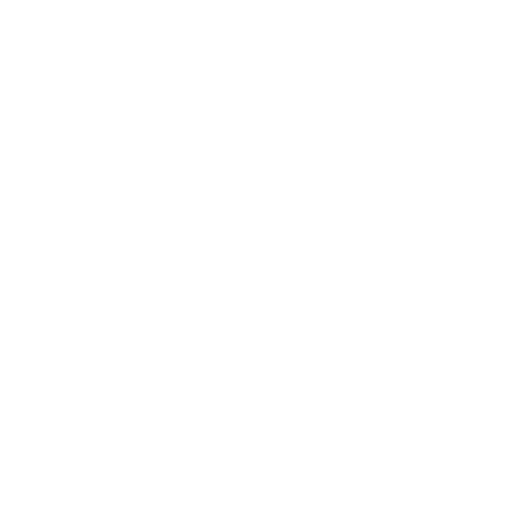

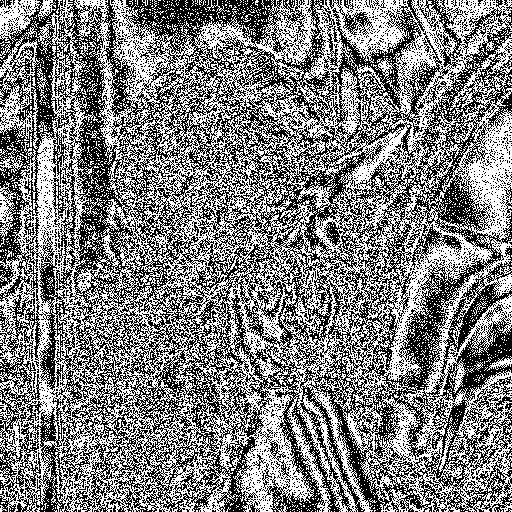

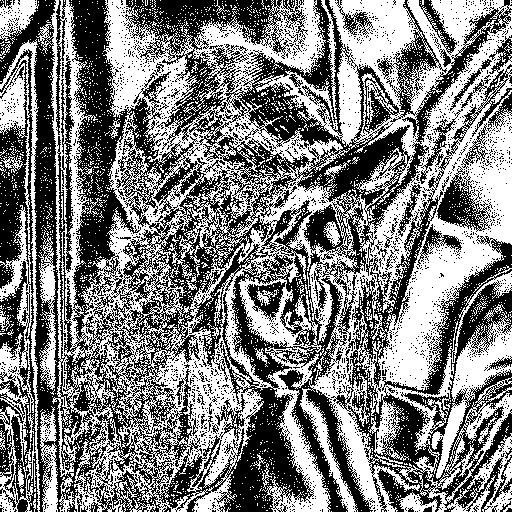

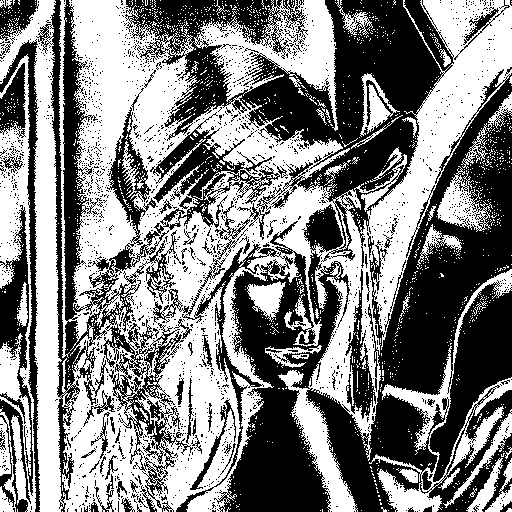

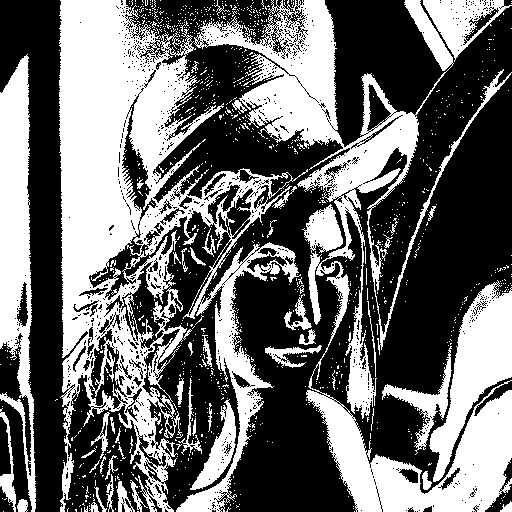

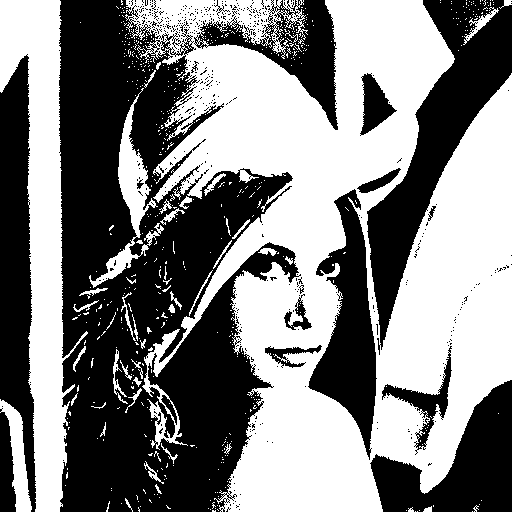

In [ ]:
lena=cv2.imread("lena.bmp",0)#讀近來讀成灰階
cv2_imshow(lena)#顯示lena
r,c=lena.shape#取長寬
x=np.zeros((r,c,8),dtype=np.uint8)#8個圖全部填0
for i in range(8):
    x[:,:,i]=2**i
r=np.zeros((r,c,8),dtype=np.uint8)
for i in range(8):
    r[:,:,i]=cv2.bitwise_and(lena,x[:,:,i])
    mask=r[:,:,i]>0
    r[mask]=255
    cv2_imshow(r[:,:,i])


# 影像加密及解密

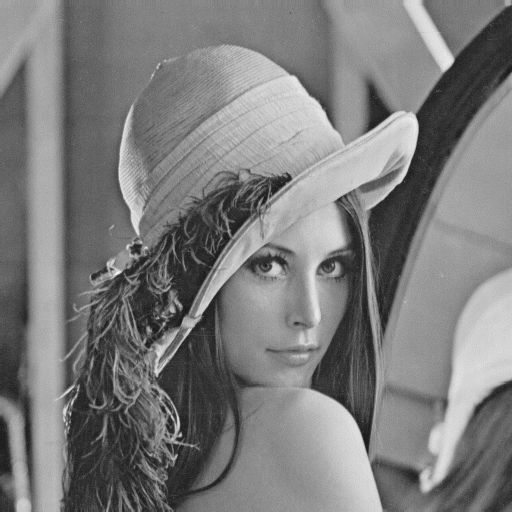

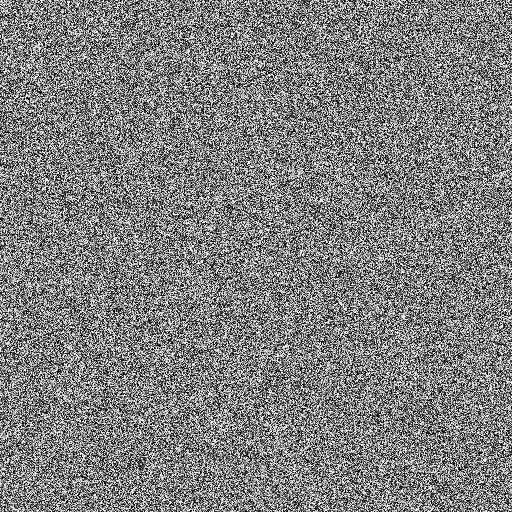

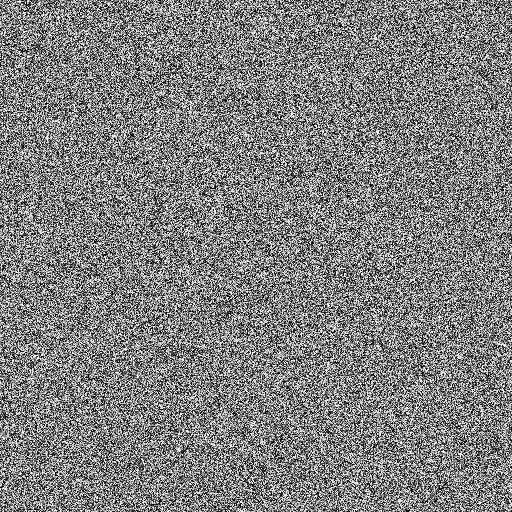

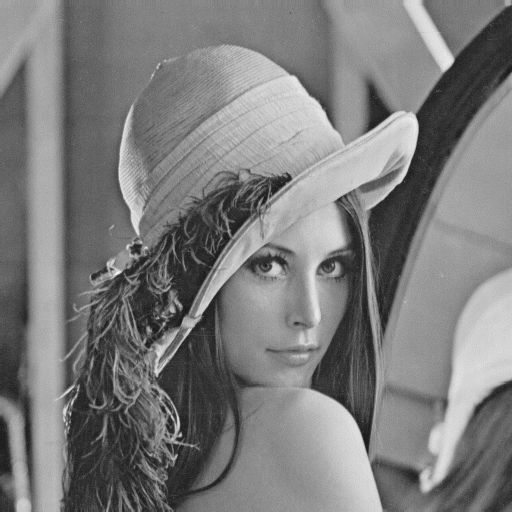

In [ ]:
lena=cv2.imread("lena.bmp",0)
r,c=lena.shape
key=np.random.randint(0,256,size=[r,c],dtype=np.uint8)#金耀 整數的亂數
encryption=cv2.bitwise_xor(lena,key)#加密
decryption=cv2.bitwise_xor(encryption,key)#解密
cv2_imshow(lena)
cv2_imshow(key)
cv2_imshow(encryption)
cv2_imshow(decryption)
